In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Let's Import the dataset
data = pd.read_csv('./data/supermarket.csv')
data.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [4]:
# Shape of our dataset
print('Shape: ', data.shape)
# Columns in our dataset
print('Columns: ', data.columns)

Shape:  (1000, 17)
Columns:  Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


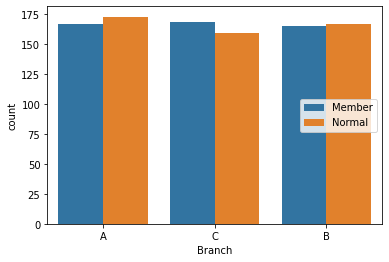

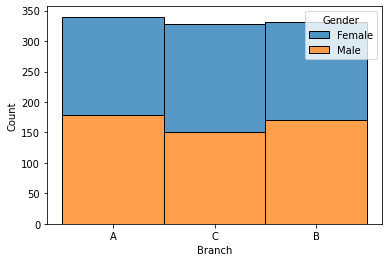

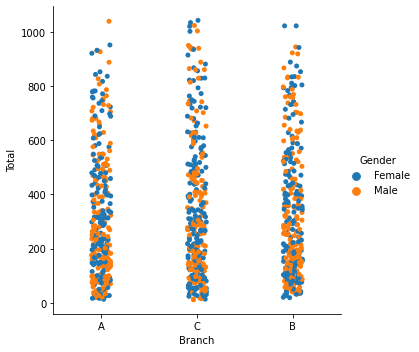

,Branch,City,Total Gross Income
0,C,Naypyitaw,5265.1765
1,A,Yangon,5057.1605
2,B,Mandalay,5057.0320


,Branch,Product line,Quantity Sold
4,A,Home and lifestyle,371
5,A,Sports and travel,333
0,A,Electronic accessories,322
2,A,Food and beverages,313
1,A,Fashion accessories,263
3,A,Health and beauty,257
11,B,Sports and travel,322
9,B,Health and beauty,320
6,B,Electronic accessories,316
7,B,Fashion accessories,297


,Product line,Quantity Sold
0,Electronic accessories,971
2,Food and beverages,952
5,Sports and travel,920
4,Home and lifestyle,911
1,Fashion accessories,902
3,Health and beauty,854


In [22]:
sns.countplot(x='Branch', hue='Customer type',  data=data)
plt.legend(loc='center right')
plt.show()
sns.histplot(x='Branch', stat='count', hue='Gender', multiple='stack', data=data)
plt.show()
sns.catplot(x='Branch', y='Total', hue='Gender', data=data)
plt.show()

display(data.groupby(['Branch', 'City'])['gross income'].sum().nlargest(3).reset_index(name='Total Gross Income'))

quan_sold = data.groupby(['Branch', 'Product line'])['Quantity'].sum().reset_index(name='Quantity Sold')
quan_sold = quan_sold.sort_values(by=['Branch', 'Quantity Sold'], ascending=[True, False])
display(quan_sold)

display(data.groupby(['Product line'])['Quantity'].sum().reset_index(name='Quantity Sold').sort_values(by=['Quantity Sold'], ascending=False))

1.As we can see the total customers in each of the branches are approximately same

2.Look's like there are slightly more customers with membership in branch C than in A and B. may be because of more female members in branch C compared to A and B.

3.Seem's like the total gross income of Brach C is greater

4.Branch A has sold most quantity from "Home and Lifestyle" section while Branch B and C has sold in "Sports and Travel" and "Food and Beverages" respectively
   
5.Most products were sold from 'Electronics Accessories" Section followed by "Food and Beverages" section

In [25]:
display(data.groupby(['Product line', 'Gender'])['Quantity'].sum().reset_index(name='Quantity Bought').sort_values(by=['Quantity Bought'], ascending=False))

,Product line,Gender,Quantity Bought
2,Fashion accessories,Female,530
4,Food and beverages,Female,514
7,Health and beauty,Male,511
8,Home and lifestyle,Female,498
10,Sports and travel,Female,496
0,Electronic accessories,Female,488
1,Electronic accessories,Male,483
5,Food and beverages,Male,438
11,Sports and travel,Male,424
9,Home and lifestyle,Male,413


As we can see clearly that female members has bought most products form "Fasion Accessories" and "Food and Beverages" which makes sense...
Most Quantites bought by male members are form "Health and Beauty Section" and second one being "Electronic accessories"

In [26]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


Unit Price of each product ranges from about 10 - 100 kyat (kyat->myanmar currency)

Quantity sold per purchase is in between 1 - 10

Another interesting thing to view is Total Column which is people tend to make purchases in range of 124-471 with mean around 322 which makes sense

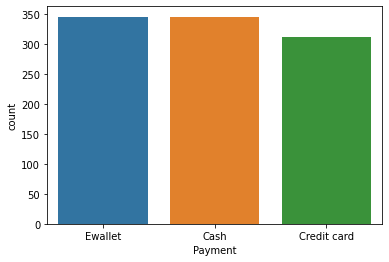

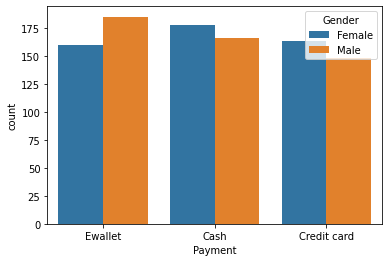

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

,Branch,Payment,Payment Preference
2,A,Ewallet,126
6,C,Cash,124
5,B,Ewallet,113
0,A,Cash,110
3,B,Cash,110
4,B,Credit card,109
8,C,Ewallet,106
1,A,Credit card,104
7,C,Credit card,98


In [40]:
sns.countplot(x='Payment', data=data)
plt.show()
sns.countplot(x='Payment', hue='Gender', data=data)
plt.show()

display(data['Payment'].value_counts())
plt.show()

display(data.groupby(['Branch', 'Payment'])['Payment'].count().reset_index(name='Payment Preference').sort_values(by=['Payment Preference'], ascending=False))

Looks like people prefer Ewallet and Cash Payment over Credit Card

Males prefer paying through Ewallet while Females prefer Cash Payment over Ewallet.

EWallet is prefered at Branch A and B and Cash is prefered at branch C

In [37]:
display(data.groupby(['Branch', 'Payment'])['Payment'].count().reset_index(name='Payment Preference').sort_values(by=['Payment Preference'], ascending=False))

,Branch,Payment,Payment Preference
2,A,Ewallet,126
6,C,Cash,124
5,B,Ewallet,113
0,A,Cash,110
3,B,Cash,110
4,B,Credit card,109
8,C,Ewallet,106
1,A,Credit card,104
7,C,Credit card,98
